In [1]:
!pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify as sq
import country_converter as coco
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [3]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

(0.0, 100.0, 0.0, 100.0)

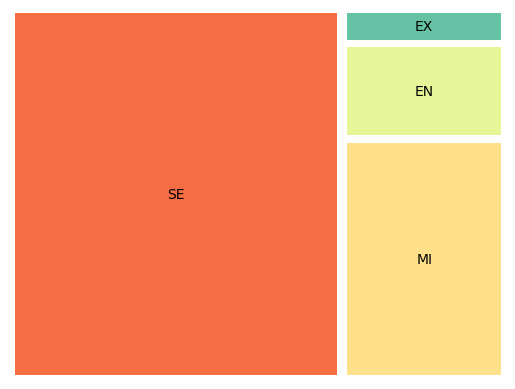

In [6]:
sq.plot(sizes=df["experience_level"].value_counts(), label=df["experience_level"].unique(),
              color=sns.color_palette("Spectral", 
                                     len(df["experience_level"].value_counts())),pad=2)
plt.axis("off")

There are 4 job level:
* EN = Entry
* SE = Senior
* MI = Mid-level
* EX = Expert

As you can see from the treemap, it is clear that most jobs in the data science belongs to senior levels which may indicate some shifts in the job markets. More companies are searching for senior employees while entry level as well as mid-level position are shrinking, increasing the competitiveness of the data science path.

<Axes: xlabel='count', ylabel='job_title'>

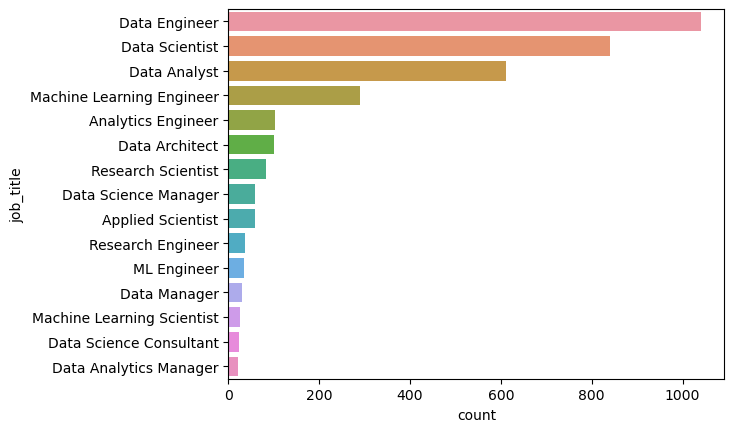

In [7]:
sns.countplot(data=df, y="job_title",order = df['job_title'].value_counts()[:15].index)

From the graph, we can deduce that most wanted jobs in the market includes data engineer, data scientist and data analyst (which is mainly what i'm doing right now =))))))))))) )

<Axes: xlabel='employment_type', ylabel='count'>

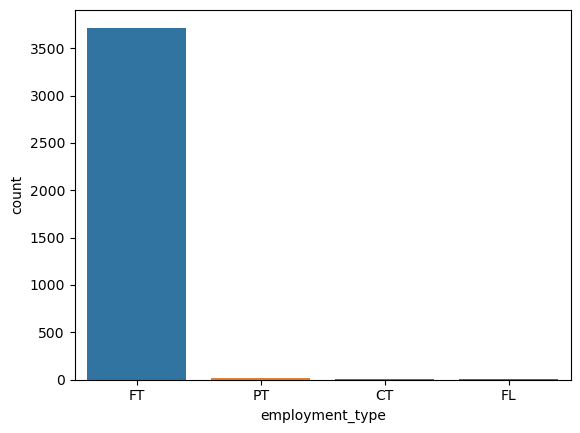

In [8]:
sns.countplot(data=df, x="employment_type",order = df['employment_type'].value_counts().index)

The graph shows that most companies hire full time employees which is a positive trend.

<Axes: xlabel='count', ylabel='job_title'>

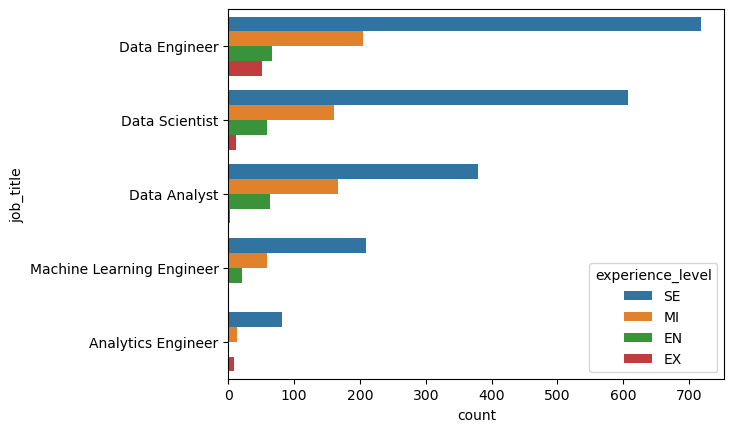

In [9]:
sns.countplot(data=df, y="job_title",order = df['job_title'].value_counts()[:5].index, hue="experience_level")

Data engineer seems to be the most sought after job at every level.

<Axes: xlabel='count', ylabel='job_title'>

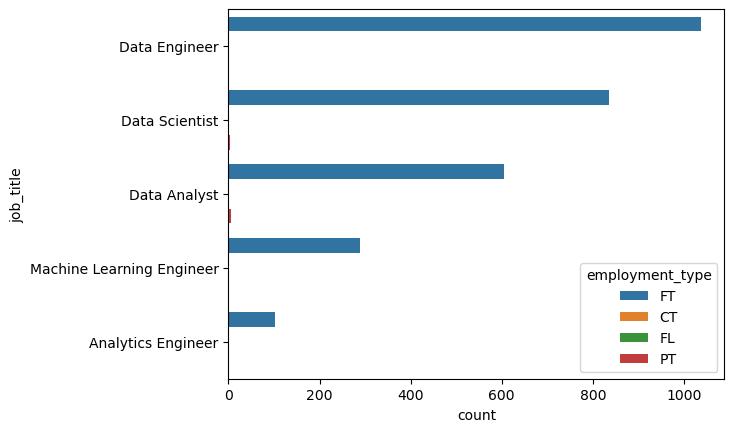

In [10]:
sns.countplot(data=df, y="job_title",order = df['job_title'].value_counts()[:5].index, hue="employment_type")

Most jobs are entirely full time which helt true for even the most sought after jobs which is data engineer.

In [11]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    title = 'Employee Location On Map')
fig.show()

Most employees are from the USA.

In [32]:
c_country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = c_country
companies = df['company_location'].value_counts()
fig = px.choropleth(locations = companies.index,
                    color = companies.values,
                    title = 'Companies Location On Map')
fig.show()

Most jobs and companies that offer the jobs themselves are located in the USA.

In [13]:
salary_location = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
means = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations = means['company_location'], color = means['salary_in_usd'],
                    title = 'Mean Salary in Countries')
fig.show()

Russia and USA seems to be among the most well-paid places for data related jobs

<Axes: xlabel='company_size', ylabel='count'>

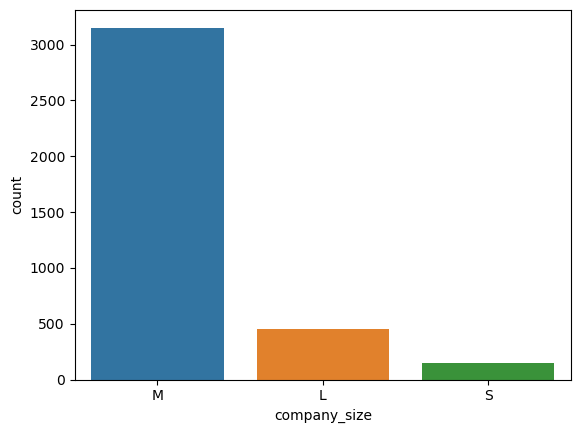

In [14]:
sns.countplot(data=df, x="company_size",order = df['company_size'].value_counts().index)

Most companies offers jobs are medium size companies

<Axes: xlabel='company_size', ylabel='count'>

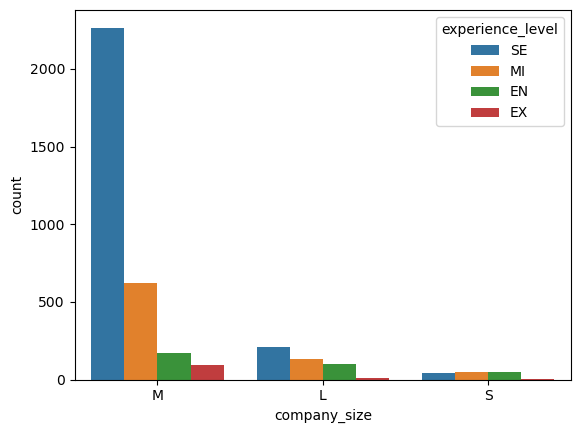

In [15]:
sns.countplot(data=df, x="company_size",order = df['company_size'].value_counts().index,hue=df['experience_level'])

Medium size companies are also in the most needs for employees especially those at a senior followed by mid level employees.

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

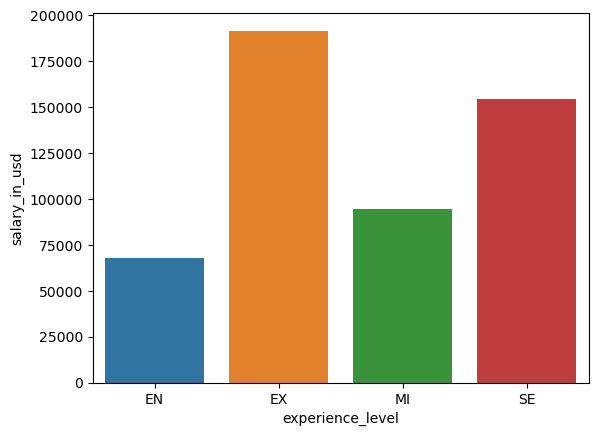

In [18]:
salary_experience = df.groupby(['salary_in_usd', 'experience_level']).size().reset_index()
means_se = salary_experience.groupby('experience_level').mean().reset_index()
sns.barplot(data=means_se, x="experience_level", y="salary_in_usd")

The higher the experience level the more you get pay, however it is concerning that the gap between entry level jobs and mid level jobs is underwhelming

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

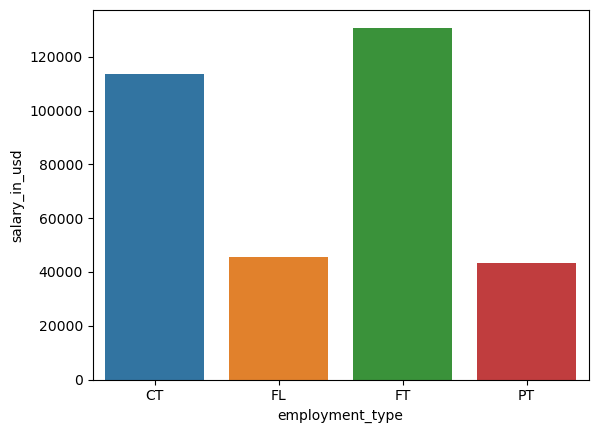

In [20]:
salary_type = df.groupby(['salary_in_usd', 'employment_type']).size().reset_index()
means_t = salary_type.groupby('employment_type').mean().reset_index()
sns.barplot(data=means_t, x="employment_type", y="salary_in_usd")

<Axes: xlabel='salary_in_usd', ylabel='job_title'>

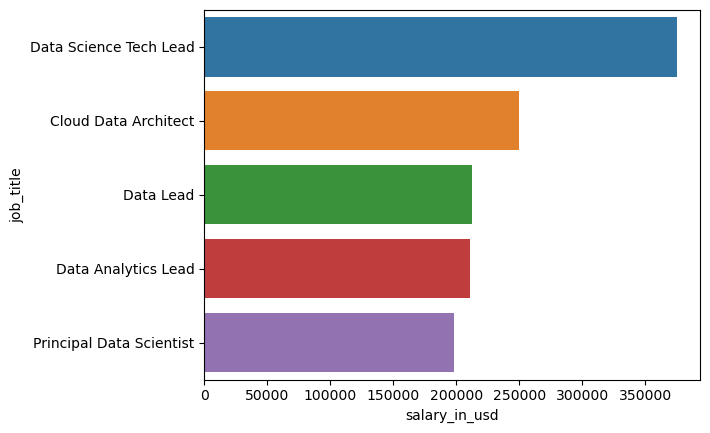

In [30]:
salary_job = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
means_j = salary_job.groupby('job_title').mean().reset_index()
means_j = means_j.sort_values(by='salary_in_usd', ascending=False)
sns.barplot(data=means_j[:5], y="job_title", x="salary_in_usd")

3 out of 5 most well-paying position are lead and expert but data science tech lead seems to have a significant gap to all other positions.